In [55]:
#test construction of the Hamiltonian

include("../src/Atoms.jl")
include("../src/scfOptions.jl")
include("../src/anderson_mix.jl")
include("../src/kerker_mix.jl")
include("../src/Ham.jl")
include("../src/hartree_pot_bc.jl")
include("../src/pseudocharge.jl")
include("../src/getocc.jl")


dx = 0.25;
Nunit = 8;
Lat = 10;
# using the default values in Lin's code
YukawaK = 0.0100
n_extra = 10; # QUESTION: I don't know where this comes from
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

betamix = 0.5;
mixdim = 10;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist;
end

sigma  = ones(Natoms,1)*(2.0);  # insulator
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1);          # number of electrons per atom
Z      = nocc;

# creating an atom structure
atoms = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
ham = Ham(Lat, Nunit, n_extra, dx, atoms,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atoms.nocc) / ham.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot!(ham, Nocc)

# we use the anderson mixing of the potential
mixOpts = andersonMixOptions(ham.Ns, betamix, mixdim )

# we use the default options
eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts, mixOpts)

# running the scf iteration
@time VtoterrHist = scf!(ham, scfOpts)

psi = ham.psi[:,1:Nocc];
F = qrfact(psi',Val{true});
psi = psi*F[:Q];

  2.883005 seconds (2.73 M allocations: 703.380 MiB, 4.45% gc time)


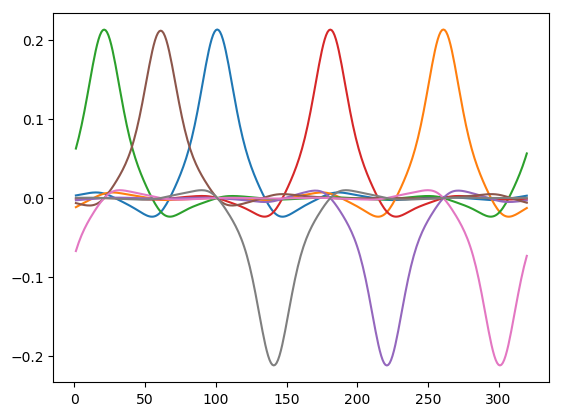

8-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x110bfac90>
 PyObject <matplotlib.lines.Line2D object at 0x110bfad50>
 PyObject <matplotlib.lines.Line2D object at 0x110bfae10>
 PyObject <matplotlib.lines.Line2D object at 0x110bfaed0>
 PyObject <matplotlib.lines.Line2D object at 0x110bfaf90>
 PyObject <matplotlib.lines.Line2D object at 0x110c06090>
 PyObject <matplotlib.lines.Line2D object at 0x110c06150>
 PyObject <matplotlib.lines.Line2D object at 0x110c06210>

In [56]:
using PyPlot
plot(1:320,psi[:,1:8])

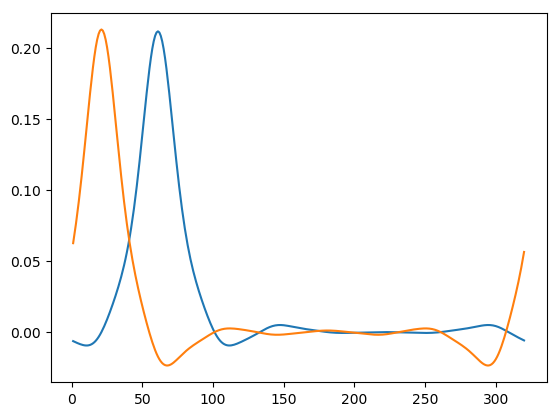

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x123cf2c50>
 PyObject <matplotlib.lines.Line2D object at 0x123cf2d10>

In [57]:
NsPerUnit = round(Integer, Lat / dx);
SysIndex = 1:NsPerUnit*2;
DensitySys = sum(psi[SysIndex,:],1);
p = sortperm(vec(DensitySys),rev=true);
Orbitals_A = psi[:,p[1:2]];
Orbitals_B = psi[:,p[3:Nocc]];
plot(1:320,Orbitals_A)

In [58]:
Gamma_B = Orbitals_B*Orbitals_B';
Gamma_A = Orbitals_A*Orbitals_A';
trace(Gamma_B*Gamma_A)

-1.349888656129615e-18

In [67]:
include("../src/Atoms.jl")
include("../src/scfOptions.jl")
include("../src/anderson_mix.jl")
include("../src/kerker_mix.jl")
include("../src/Ham.jl")
include("../src/hartree_pot_bc.jl")
include("../src/pseudocharge.jl")
include("../src/getocc.jl")

dx = 0.25;
Nunit = 8;
Lat = 10;
# using the default values in Lin's code
YukawaK = 0.0100
n_extra = 10; # QUESTION: I don't know where this comes from
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

betamix = 0.5;
mixdim = 10;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist;
end

sigma  = ones(Natoms,1)*(2.0);  # insulator
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = zeros(Natoms,1);
nocc[1] = 1;      # number of electrons per atom
nocc[2] = 1;
Z      = nocc;

# creating an atom structure
atomsSys = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
hamSys = Ham(Lat, Nunit, n_extra, dx, atomsSys,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atomsSys.nocc) / ham.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot_AinB!(hamSys, Nocc, Orbitals_B)

# we use the anderson mixing of the potential
mixOpts = andersonMixOptions(hamSys.Ns, betamix, mixdim )

# we use the default options
eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts, mixOpts)

# running the scf iteration
@time VtoterrHist = scf_AinB!(hamSys, scfOpts, Orbitals_B)

[-10.7159, -10.423, -10.1244, -9.82032, -9.52417, -9.2194, -8.91678, -8.61365, -8.30591, -8.00402, -7.6941, -7.3926]
[-9.29778, -9.28246, -8.96415, -8.89475, -8.68432, -8.48272, -8.25042, -8.01174, -7.75569, -7.49878, -7.22729, -6.95868]
[-9.34841, -9.27786, -9.14054, -8.96643, -8.76568, -8.54634, -8.30772, -8.06371, -7.80307, -7.54278, -7.26834, -6.99727]
[-9.0384, -9.01337, -8.86259, -8.72794, -8.54927, -8.35061, -8.12855, -7.89867, -7.6503, -7.401, -7.13647, -6.87405]
[-9.0114, -8.97564, -8.84547, -8.70349, -8.52738, -8.33108, -8.11047, -7.88199, -7.63493, -7.38672, -7.1233, -6.86178]
[-9.12562, -9.06709, -8.96264, -8.80165, -8.61308, -8.40888, -8.1819, -7.94806, -7.69629, -7.44383, -7.17651, -6.91162]
[-9.08579, -9.03731, -8.929, -8.77269, -8.58692, -8.38525, -8.16025, -7.9281, -7.67781, -7.42665, -7.16053, -6.89669]
[-9.0857, -9.03739, -8.92897, -8.77268, -8.58691, -8.38524, -8.16024, -7.92809, -7.6778, -7.42665, -7.16052, -6.89668]
[-9.10525, -9.04561, -8.94367, -8.78531, -8.5979

18-element Array{Float64,1}:
 0.158955   
 0.0361496  
 0.0465113  
 0.0446071  
 0.0416228  
 0.00941913 
 0.00654488 
 0.0066788  
 0.00620143 
 8.72135e-5 
 0.000266409
 5.60245e-5 
 4.7408e-5  
 1.83581e-5 
 1.71933e-6 
 9.69044e-7 
 1.09577e-7 
 1.20047e-8 

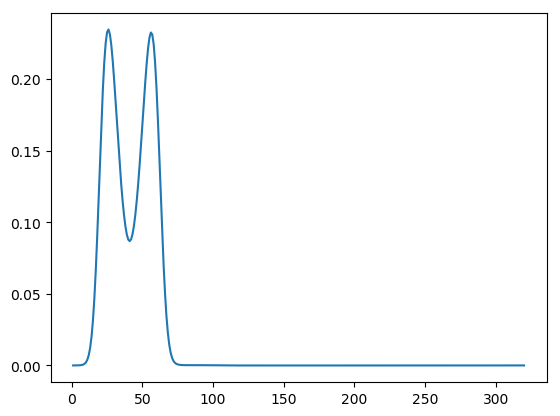

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1380b6990>

In [68]:
plot(1:320,hamSys.rho)

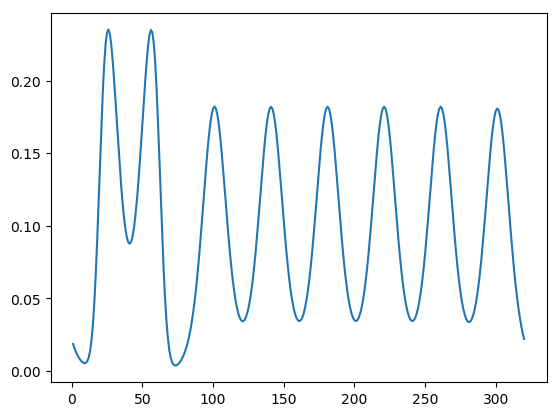

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x124dca990>

In [70]:
rho_AinB = hamSys.rho + sum(Orbitals_B.^2,2)/ham.dx;
plot(1:320,rho_AinB)